In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
accidents = pd.read_csv('accidents_2017.csv')
accidents = accidents.rename(columns={'District Name': 'District_Name', 'Part of the day': 'Part_of_the_day'})
accidents

,Id,District_Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part_of_the_day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,2017S003667,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Tuesday,April,25,8,Morning,1,0,1,3,2.201800,41.392004
10335,2017S001896,Sant Andreu,el Bon Pastor,PL MONTERREY ...,Wednesday,March,8,12,Morning,1,0,1,2,2.206013,41.443445
10336,2017S010718,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Thursday,December,28,8,Morning,1,0,1,2,2.205607,41.443894
10337,2017S006145,Sant Andreu,el Bon Pastor,Litoral (Besòs) ...,Friday,July,14,14,Afternoon,1,0,1,2,2.205118,41.444824


In [6]:
month = accidents.groupby(by=['Month']).count().sort_values(by=['Id'],ascending=False)
month

,Id,District_Name,Neighborhood Name,Street,Weekday,Day,Hour,Part_of_the_day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
Month,,,,,,,,,,,,,,
November,991,991,991,991,991,991,991,991,991,991,991,991,991,991
May,963,963,963,963,963,963,963,963,963,963,963,963,963,963
March,935,935,935,935,935,935,935,935,935,935,935,935,935,935
October,928,928,928,928,928,928,928,928,928,928,928,928,928,928
July,918,918,918,918,918,918,918,918,918,918,918,918,918,918
June,908,908,908,908,908,908,908,908,908,908,908,908,908,908
April,845,845,845,845,845,845,845,845,845,845,845,845,845,845
January,844,844,844,844,844,844,844,844,844,844,844,844,844,844
February,824,824,824,824,824,824,824,824,824,824,824,824,824,824


In [14]:
AccidentsNovember = accidents.query('Month == "November"')
AccidentsNovember = AccidentsNovember[['District_Name', 'Weekday','Part_of_the_day']]
AccidentsNovember

,District_Name,Weekday,Part_of_the_day
17,Sant Martí,Thursday,Night
25,Sant Martí,Wednesday,Afternoon
36,Sant Martí,Friday,Morning
52,Sant Martí,Friday,Morning
101,Sant Martí,Tuesday,Night
...,...,...,...
10281,Sant Andreu,Wednesday,Afternoon
10290,Sant Andreu,Wednesday,Morning
10298,Sant Andreu,Sunday,Afternoon
10302,Sant Andreu,Wednesday,Morning


In [22]:
AccidentsD = AccidentsNovember.groupby(by=['District_Name']).count().sort_values(by=['Weekday'], ascending=False)
AccidentsD

,Weekday,Part_of_the_day
District_Name,,
Eixample,310,310
Sant Martí,124,124
Sants-Montjuïc,105,105
Sarrià-Sant Gervasi,98,98
Horta-Guinardó,78,78
Les Corts,68,68
Sant Andreu,68,68
Nou Barris,60,60
Gràcia,41,41


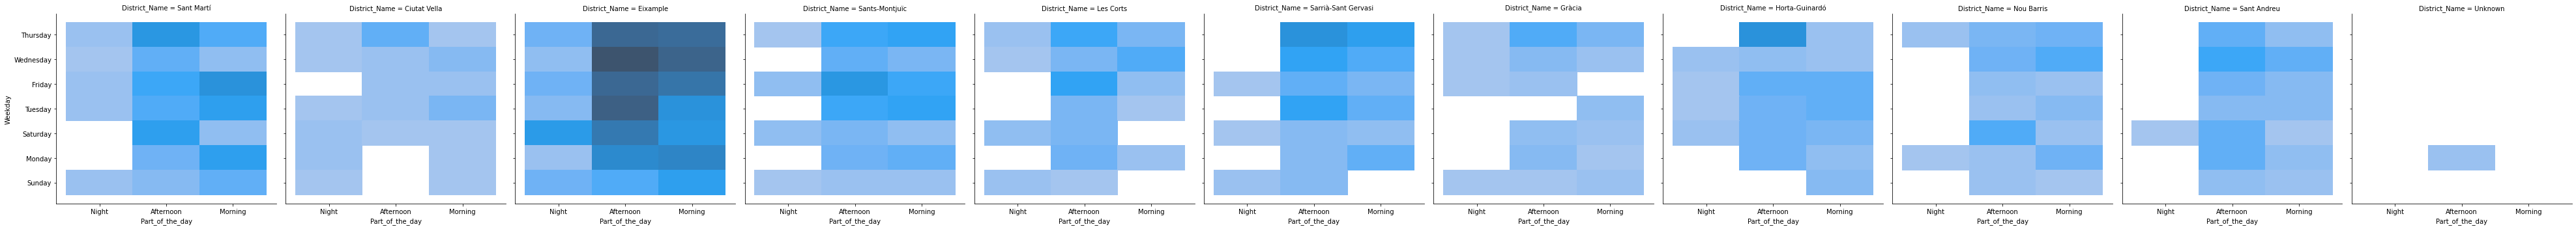

In [13]:
sns.displot(AccidentsNovember,col='District_Name', x='Part_of_the_day',y='Weekday')